In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
df = pd.read_excel('/Users/YashJi/Desktop/TASK.xlsx') # Reading Data from Excel

In [202]:
df # to display whole dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [242]:
df.head() #to display top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [203]:
df.shape # to know number of rows and column in given dataset

(25, 2)

In [204]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [237]:
# Univariate Analysis, To check Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddd8da4d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddd8da4af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddd8da4c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddd8d94cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddd8984bb0>],
 'means': []}

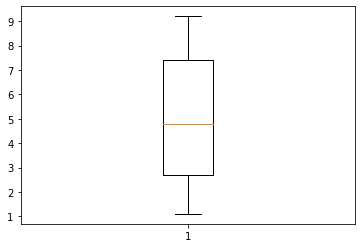

In [238]:
plt.boxplot(df['Hours'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddd98872b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddd9887910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddd9879f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddd9887fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddd9893370>],
 'means': []}

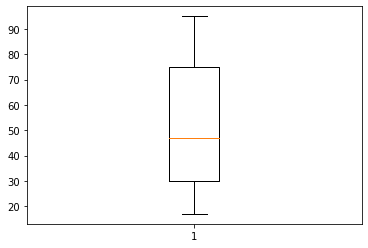

In [239]:
plt.boxplot(df['Scores'])

In [205]:
df.describe(percentiles = [0.01,0.05,0.25,0.5,0.75,0.90,0.99,1.0]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,99%,100%,max
Hours,25.0,5.012,2.525094,1.1,1.196,1.58,2.7,4.8,7.4,8.42,9.128,9.2,9.2
Scores,25.0,51.480,25.286887,17.0,17.720,20.20,30.0,47.0,75.0,85.60,93.320,95.0,95.0


In [206]:
df.isnull().sum() # To check null values

Hours     0
Scores    0
dtype: int64

In [207]:
df.columns.tolist()

['Hours', 'Scores']

In [ ]:
## Bivariate Analysis

Text(0.5, 1.0, 'Hours Vs Score')

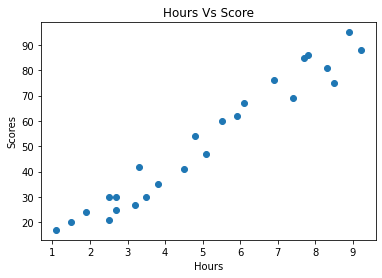

In [208]:
plt.scatter(x = df['Hours'], y = df['Scores']) # To check linearity of data
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Vs Score')

In [243]:
X = df['Hours'] # Seperating Independent Feautre
Y = df['Scores'] # Seperating dependent Feautre

In [244]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .3, random_state = 42) # Splitting The Data

In [245]:
xTrain = xTrain.values.reshape(-1, 1)
yTrain = yTrain.values.reshape(-1, 1)
xTest = xTest.values.reshape(-1, 1)
yTest = yTest.values.reshape(-1, 1)

In [246]:
from sklearn.linear_model import LinearRegression 

In [247]:
linearRegressor = LinearRegression()

In [248]:
linearRegressor.fit(xTrain, yTrain) # Training our model

LinearRegression()

In [215]:
linearRegressor.intercept_ 

array([2.79419668])

In [216]:
linearRegressor.coef_  

array([[9.71054094]])

In [217]:
yPred = linearRegressor.predict(xTrain) # Predicting from training data

In [218]:
yPred

array([[39.69425223],
       [17.36000808],
       [33.86792767],
       [46.49163089],
       [89.21801101],
       [85.33379464],
       [36.78108995],
       [29.0126572 ],
       [21.24422446],
       [49.40479317],
       [62.02849639],
       [78.53641598],
       [56.20217183],
       [77.56536189],
       [13.47579171],
       [74.65219961],
       [92.13117329]])

In [219]:
yTrain.shape

(17, 1)

In [220]:
yTrain

array([[35],
       [20],
       [27],
       [41],
       [95],
       [75],
       [30],
       [30],
       [24],
       [54],
       [67],
       [86],
       [60],
       [85],
       [17],
       [69],
       [88]])

In [221]:
yPred.shape

(17, 1)

In [222]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(yTrain, yPred))  
print('Mean Squared Error :', metrics.mean_squared_error(yTrain, yPred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(yTrain, yPred)))

Mean Absolute Error : 5.1708315630914194
Mean Squared Error : 31.398307995353253
Root Mean Squared Error : 5.603419312826166


In [223]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(yTrain, yPred)

In [224]:
r2

0.9536486503889446

In [225]:
yPred = linearRegressor.predict(xTest) # Predicting From Testing Data

In [226]:
yPred

array([[83.39168645],
       [27.07054902],
       [27.07054902],
       [69.79692914],
       [60.0863882 ],
       [29.0126572 ],
       [34.83898177],
       [52.31795545]])

In [227]:
yTest.shape

(8, 1)

In [228]:
yTest

array([[81],
       [30],
       [21],
       [76],
       [62],
       [25],
       [42],
       [47]])

In [229]:
yPred.shape

(8, 1)

In [230]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(yTest, yPred))  
print('Mean Squared Error :', metrics.mean_squared_error(yTest, yPred))  
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(yTest, yPred)))

Mean Absolute Error : 4.499999999999998
Mean Squared Error : 23.61945761415174
Root Mean Squared Error : 4.859985351228103


In [231]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(yTest, yPred)

In [232]:
r2

0.9487647340257012

In [233]:
from joblib import load 
from joblib import dump

In [234]:
dump(linearRegressor, "Spark_foundation.joblib") # Pickle  of model , Saving the model objects

['Spark_foundation.joblib']

In [235]:
lr=load("Spark_foundation.joblib")

In [236]:
#Y_Pred
# Predicting for a new value
linearRegressor.predict([[9.25]])

array([[92.61670034]])

In [241]:
print("Predicted Score For 9.25hrs : ",linearRegressor.predict([[9.25]]))

Predicted Score For 9.25hrs :  [[92.61670034]]
